Imports

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
###Assuming csv file is in the same folder as this python file
data = pd.read_csv("bank-full.csv", sep = ";", header = 0)
data = pd.DataFrame(data)
data.head(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Understanding the data, and verifying no negative values for numbers

In [17]:
columns_to_check = ['age', 'job', 'marital', 'education', 'default', 'housing',
                     'loan', 'contact', 'campaign', 'previous', 'poutcome', 'y']

# Iterate through the specified columns and print unique values
for column in columns_to_check:
    if column in data.columns:
        unique_values = data[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)
        print()  # Print a newline for better readability
    else:
        print(f"Column '{column}' not found in DataFrame.")
        print()

Unique values in column 'age':
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

Unique values in column 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in column 'marital':
['married' 'single' 'divorced']

Unique values in column 'education':
['tertiary' 'secondary' 'unknown' 'primary']

Unique values in column 'default':
['no' 'yes']

Unique values in column 'housing':
['yes' 'no']

Unique values in column 'loan':
['no' 'yes']

Unique values in column 'contact':
['unknown' 'cellular' 'telephone']

Unique values in column 'campaign':
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]



In [19]:
## Checking for impossible values, for negative balance it is fine I just wanted to know how many owed money
columns_to_check = ['balance', 'age']
for column in columns_to_check:
    negative_values = data[data[column] < 0]
    if not negative_values.empty:
        print(f"Number of negative values in '{column}': {negative_values.shape[0]}")
    else:
        print(f"No negative values found in column '{column}'.")
        print()  # Print a newline for better readability

Number of negative values in 'balance': 3766
No negative values found in column 'age'.



Plotting some graphs to get distribution of particular values

Median balance (Subscribed): 733.00
Average balance (Subscribed): 1804.27
Median balance (Not Subscribed): 417.00
Average balance (Not Subscribed): 1303.71


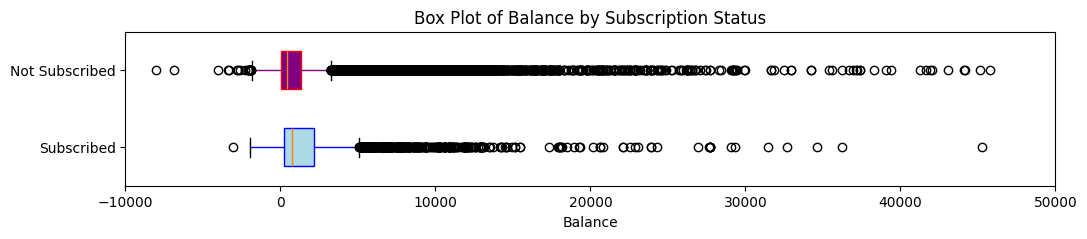

In [66]:
datayes = data[data['y'] == 'yes']
datano = data[data['y'] == 'no']
# Create box plots for 'balance' column in both data subsets
plt.figure(figsize=(12, 2))

# Plot for 'datayes'
plt.boxplot(datayes['balance'].dropna(), vert=False, positions=[1], widths=0.5, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'))

# Plot for 'datano'
plt.boxplot(datano['balance'].dropna(), vert=False, positions=[2], widths=0.5, patch_artist=True, 
            boxprops=dict(facecolor='purple', color='red'),
            whiskerprops=dict(color='purple'))

# Customize the plot
plt.title('Box Plot of Balance by Subscription Status')
plt.xlabel('Balance')
plt.xlim(-10000, 50000)
plt.yticks([1, 2], ['Subscribed', 'Not Subscribed'])

# Calculate and print median and mean for both subsets
median_balance_yes = np.median(datayes['balance'].dropna())
mean_balance_yes = np.mean(datayes['balance'].dropna())

median_balance_no = np.median(datano['balance'].dropna())
mean_balance_no = np.mean(datano['balance'].dropna())

print(f"Median balance (Subscribed): {median_balance_yes:.2f}")
print(f"Average balance (Subscribed): {mean_balance_yes:.2f}")
print(f"Median balance (Not Subscribed): {median_balance_no:.2f}")
print(f"Average balance (Not Subscribed): {mean_balance_no:.2f}")

plt.show()



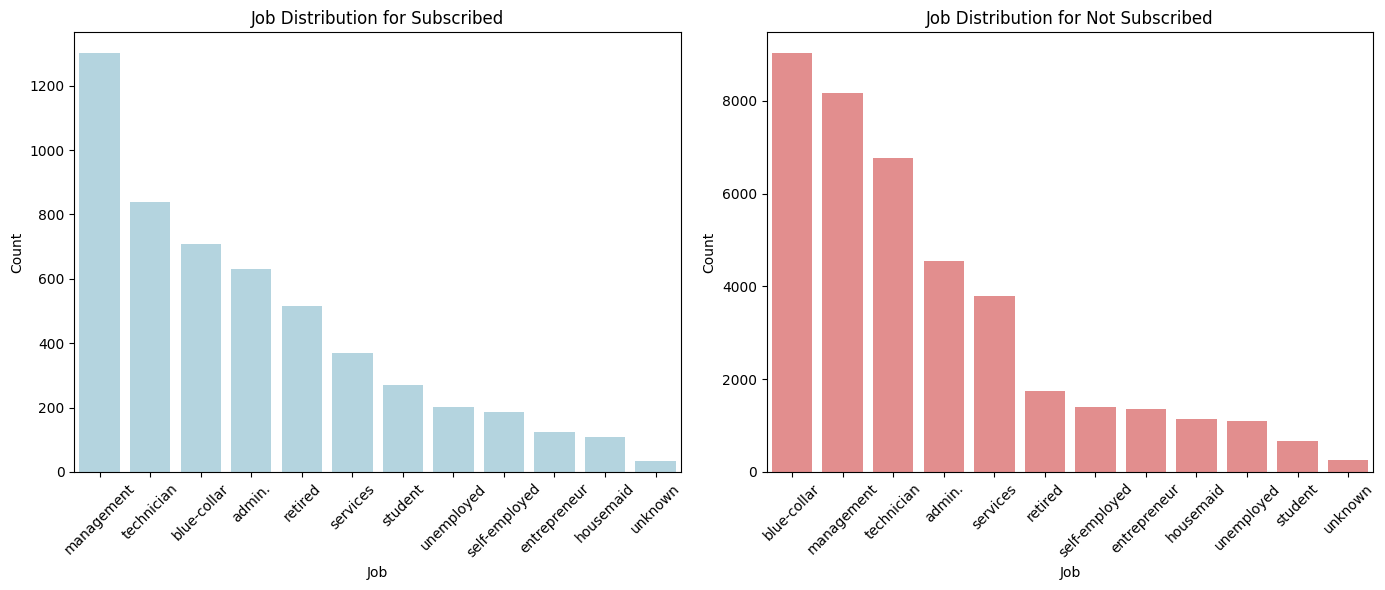

In [68]:
plt.figure(figsize=(14, 6))

# Plot count plot for 'job' column in 'datayes'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.countplot(data=datayes, x='job', order=datayes['job'].value_counts().index, color='lightblue')
plt.title('Job Distribution for Subscribed')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot count plot for 'job' column in 'datano'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.countplot(data=datano, x='job', order=datano['job'].value_counts().index, color='lightcoral')
plt.title('Job Distribution for Not Subscribed')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

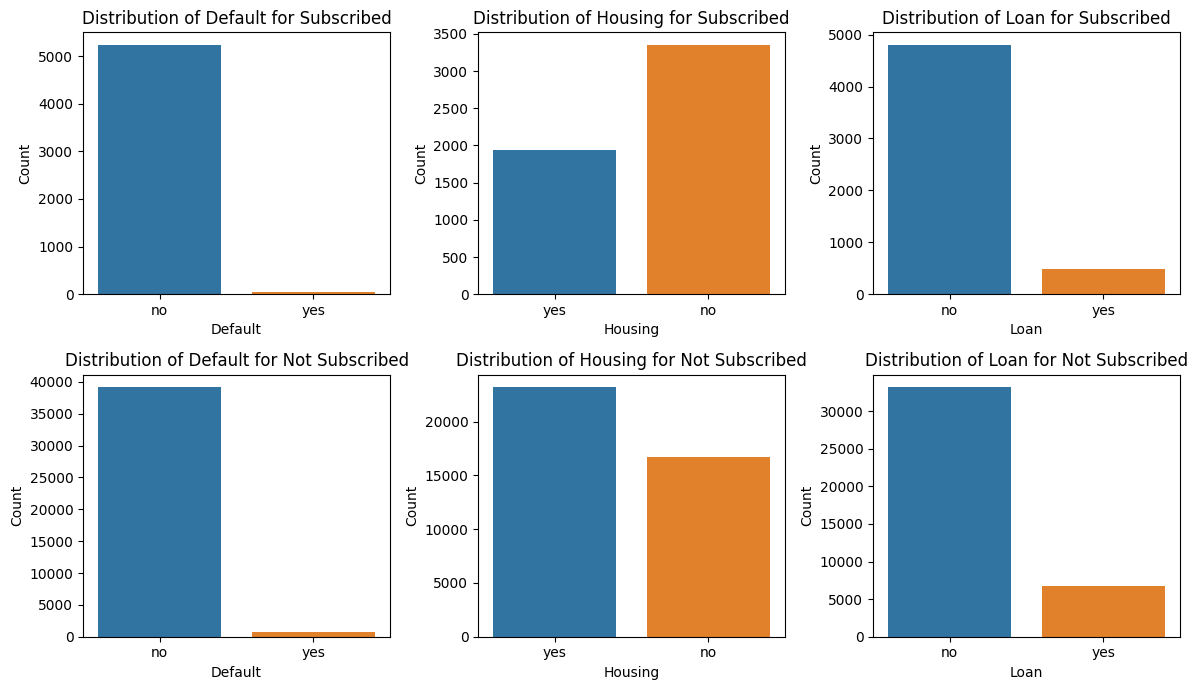

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(12, 7))

# Plot for 'default', 'housing', 'loan' in 'datayes'
plt.subplot(2, 3, 1)
sns.countplot(x='default', data=datayes)
plt.title('Distribution of Default for Subscribed')
plt.xlabel('Default')
plt.ylabel('Count')

plt.subplot(2, 3, 2)
sns.countplot(x='housing', data=datayes)
plt.title('Distribution of Housing for Subscribed')
plt.xlabel('Housing')
plt.ylabel('Count')

plt.subplot(2, 3, 3)
sns.countplot(x='loan', data=datayes)
plt.title('Distribution of Loan for Subscribed')
plt.xlabel('Loan')
plt.ylabel('Count')

# Plot for 'default', 'housing', 'loan' in 'datano'
plt.subplot(2, 3, 4)
sns.countplot(x='default', data=datano)
plt.title('Distribution of Default for Not Subscribed')
plt.xlabel('Default')
plt.ylabel('Count')

plt.subplot(2, 3, 5)
sns.countplot(x='housing', data=datano)
plt.title('Distribution of Housing for Not Subscribed')
plt.xlabel('Housing')
plt.ylabel('Count')

plt.subplot(2, 3, 6)
sns.countplot(x='loan', data=datano)
plt.title('Distribution of Loan for Not Subscribed')
plt.xlabel('Loan')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

